In [2]:
from plantcv import plantcv as pcv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import img_as_ubyte
from skimage.exposure import adjust_gamma
import pandas as pd

In [8]:
print(pcv.__version__)

3.13.0+13.gd6d5ef42


In [3]:
pcv.params.debug = "plot"
pcv.params.dpi = 125

## Input data

In [4]:
infile = "imgs/PSII_HDR_05-24-2021_BTX623_COLD_R3.INF"
# infile = "/Users/nfahlgren/GitHub/plantcv/tests/photosynthesis_data/PSII_HDR_supopt_temp_btx623_22_rep1.INF"

In [5]:
ps = pcv.photosynthesis.read_cropreporter(filename=infile)

ValueError: cannot reshape array of size 1700 into shape (0,1296,966)

### Print what data were imported

In [5]:
print(ps)

PSII variables defined:
darkadapted
lightadapted
spectral
chlorophyll
datapath
filename


## Create a mask

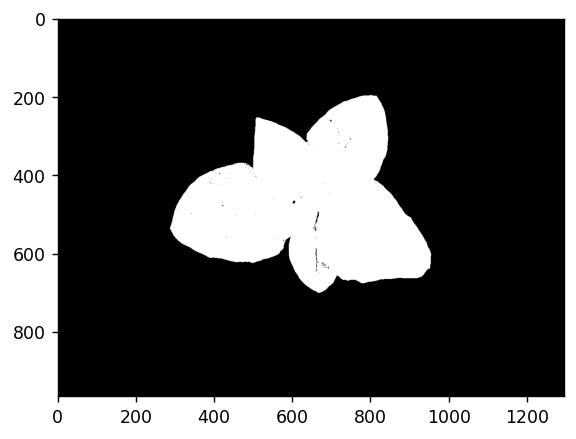

In [6]:
#make fmin for masking
fmin = ps.darkadapted.sel(frame_label="F0").data.squeeze()

In [ ]:
plant_mask = pcv.threshold.binary(gray_img=fmin, threshold=150, max_value=256, object_type="light")

In [ ]:
filled_mask = pcv.fill(bin_img=plant_mask, size=40)

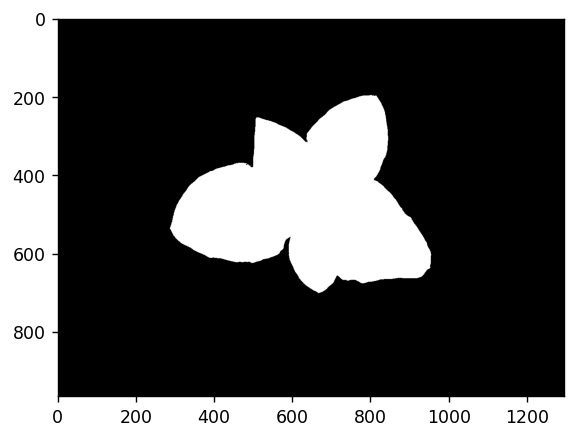

In [7]:
mask = pcv.fill_holes(bin_img=mask)

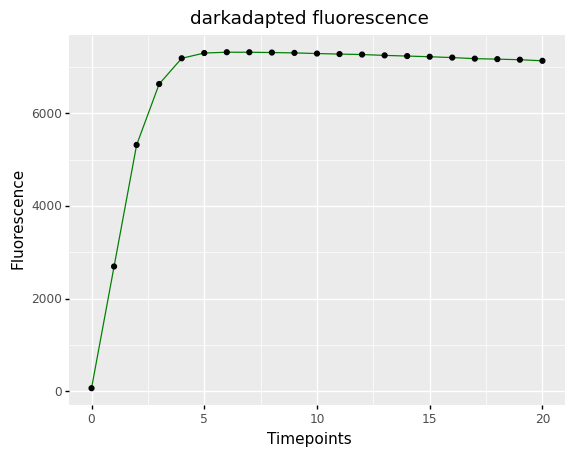

In [8]:
da, ind_fig, ind_df = pcv.photosynthesis.reassign_frame_labels(ps_da=ps.darkadapted, mask=mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


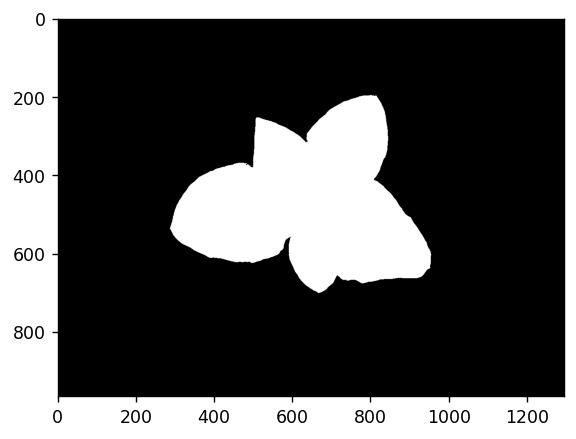

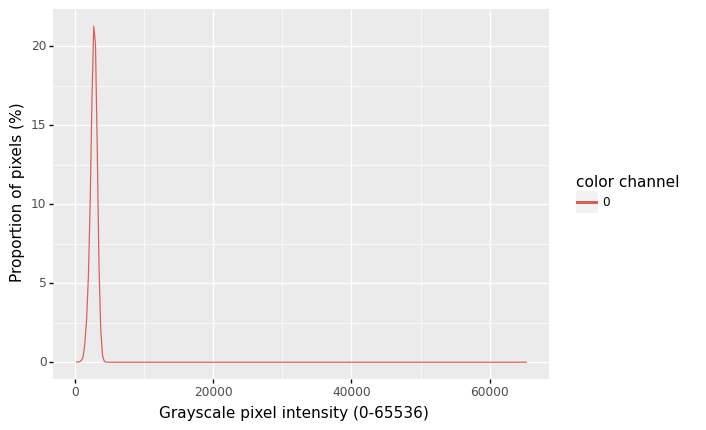

In [9]:
f0_hist = pcv.analyze_nir_intensity(gray_img=da.sel(frame_label="F0").data, mask=mask, label="F0")

In [13]:
pcv.outputs.observations["F0"]["nir_median"]["value"]

2723.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


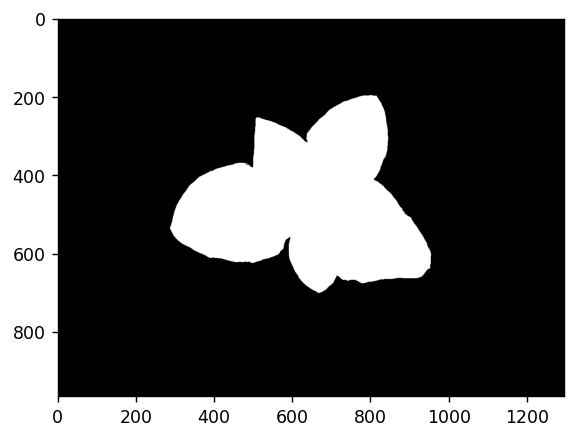

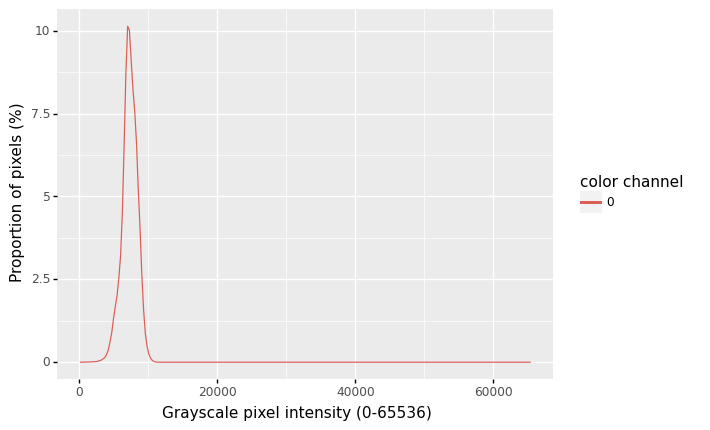

In [14]:
fm_hist = pcv.analyze_nir_intensity(gray_img=da.sel(frame_label="Fm").data, mask=mask, label="Fm")

In [15]:
pcv.outputs.observations["Fm"]["nir_median"]["value"]

7341.0